# Artificial Neural Networks Implementation

2024-08-03 20:03:58.413675: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 20:03:58.416571: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 20:03:58.425522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 20:03:58.438901: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 20:03:58.442869: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 20:03:58.452783: I tensorflow/core/platform/cpu_feature_gu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

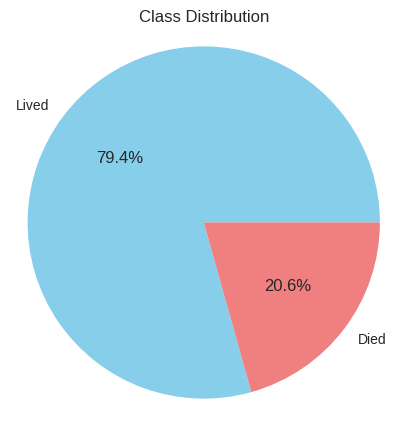

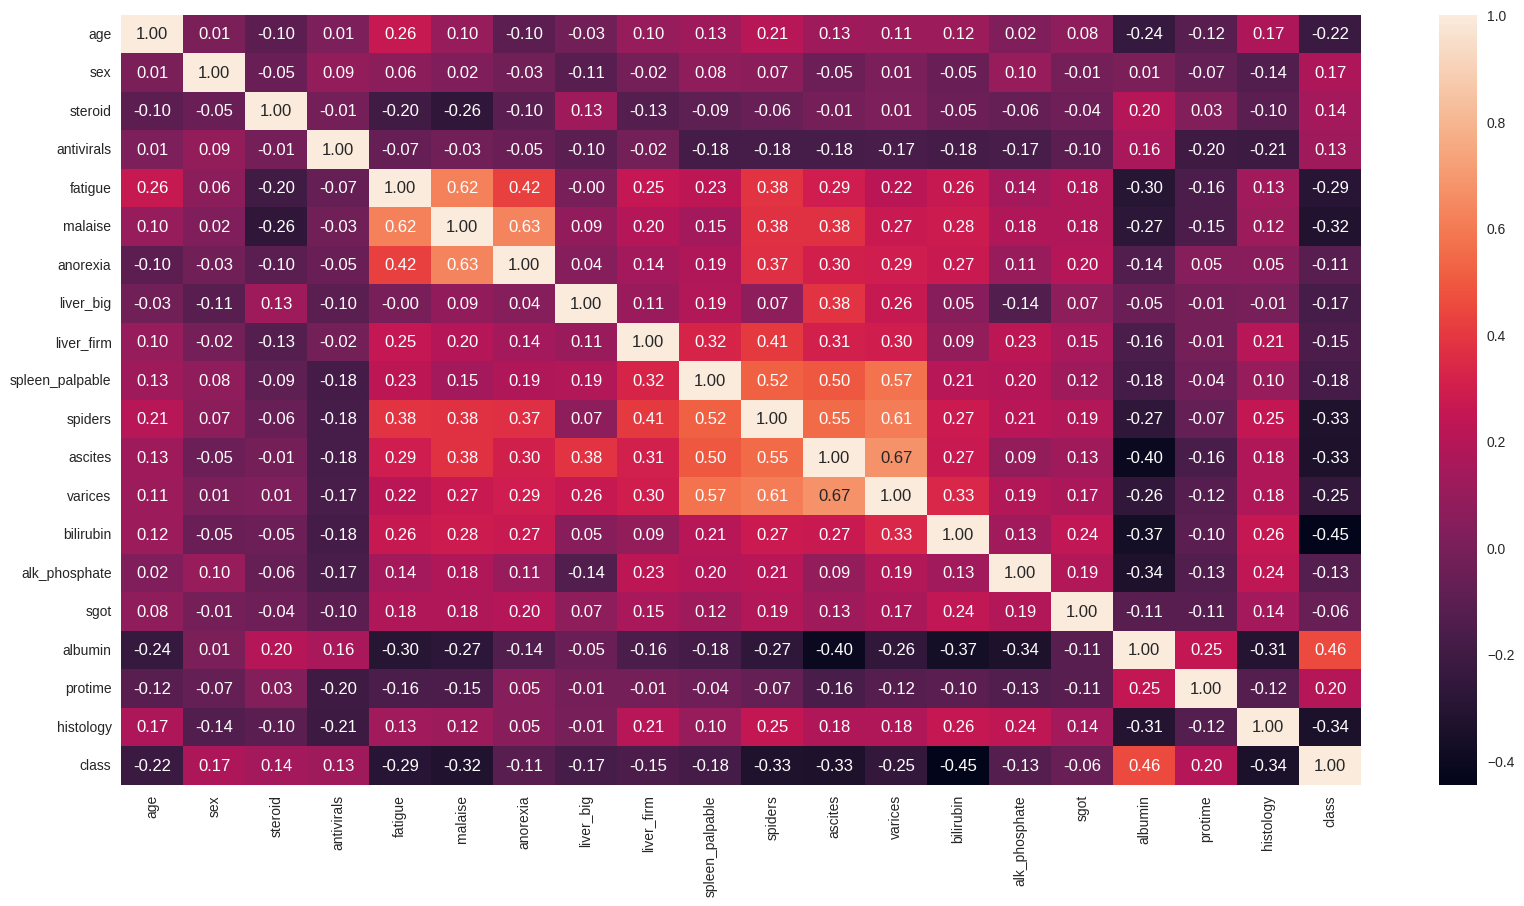

In [1]:
# Ensure matplotlib plots are displayed inline
%matplotlib inline

# Import necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from EDA_Optimized import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score


# Import custom module for EDA
from EDA_Optimized import *

### Check TensorFlow version

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


### Instantiate and fit SMOTE

In [3]:
### Instantiating SMOTE
sm = SMOTE(random_state=42)

### Fit SMOTE to training data
X_resampled, y_resampled = sm.fit_resample(X, y)

### Printing class disribution of original and resampled data

In [4]:
print("Class Distribution before Resampleing: ", y.value_counts())

print("\nClass Distribution afer Resampling", y_resampled.value_counts())

Class Distribution before Resampleing:  class
1    123
0     32
Name: count, dtype: int64

Class Distribution afer Resampling class
1    123
0    123
Name: count, dtype: int64


###  Using bootstrapping to further increase dataset size

In [5]:
X_resampled, y_resampled = resample(X_resampled, y_resampled, n_samples=1000, random_state=42)

In [6]:
X = X_resampled.values
y = y_resampled.values

### Split the dataset into training and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=0
)

### Feature scaling

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Initialize the ANN

In [9]:
model = tf.keras.models.Sequential()

In [10]:
# Adding the input layer and first hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(x_train.shape[1],)))

# Adding the second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compile the ANN

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the ANN

In [12]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.4119 - loss: 0.9086 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.4899 - loss: 0.8290
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.5156 - loss: 0.7703
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.5728 - loss: 0.7069
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.6304 - loss: 0.6782
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6229 - loss: 0.6889
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.6883 - loss: 0.6411
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.6857 - loss: 0.6217
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.7098 - loss: 0.5884
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.7278 - loss: 0.5655
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.7575 - loss: 0.5267
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9829 - loss: 0.0788
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.9782 - loss: 0.0789
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9862 - loss: 0.0788
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9894 - loss: 0.0767
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9901 - loss: 0.0688
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9902 - loss: 0.0679
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9923 - loss: 0.0575
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9888 - loss: 0.0618
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9925 - loss: 0.0619
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9918 - loss: 0.0541
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9872 - loss: 0.0638
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 73

### Predict the test set results

In [13]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
result = (np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [14]:
for item in result:
    print(item)

[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[0 0]
[1 1]
[0 0]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[1 1]
[1 1]
[0 0]
[0 0]
[0 0]
[1 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[0 0]
[1 1]
[1 0]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[0 0]
[1 1]
[0 0]
[1 1]
[1 1]
[0 0]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[1 1]
[1 1]
[0 0]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[1 1]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[1 1]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0

### Evaluate the model

In [15]:
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[101,   2],
       [  1,  96]])

In [17]:
accuracy = accuracy_score(y_test, y_pred)

In [18]:
# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print results
print("Confusion Matrix:\n", cm)
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"Accuracy: {accuracy*100:.2f}%")

Confusion Matrix:
 [[101   2]
 [  1  96]]
True Positives: 96
True Negatives: 101
False Positives: 2
False Negatives: 1
Accuracy: 98.50%


### Displaying the confusion Matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


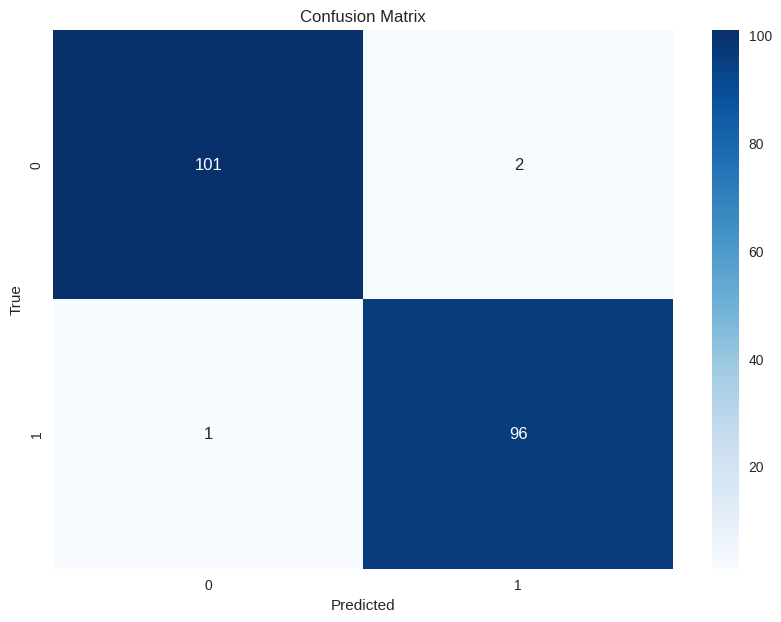

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Adjust threshold as needed

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()


### AUC Curve

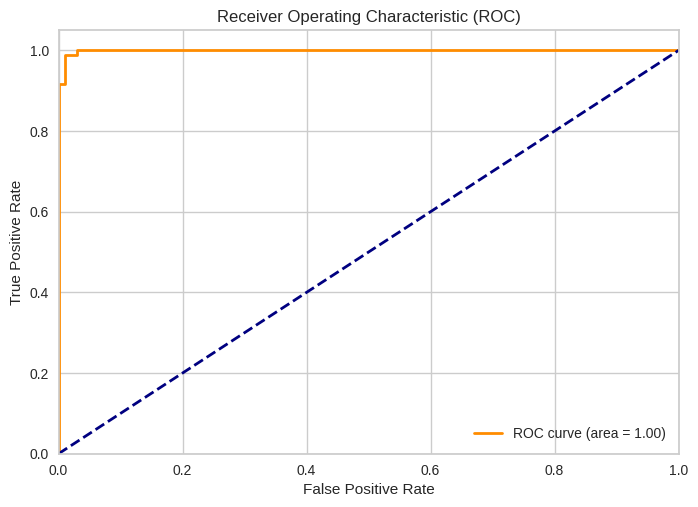

In [20]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()


### Precision-Recall (PR) Curve

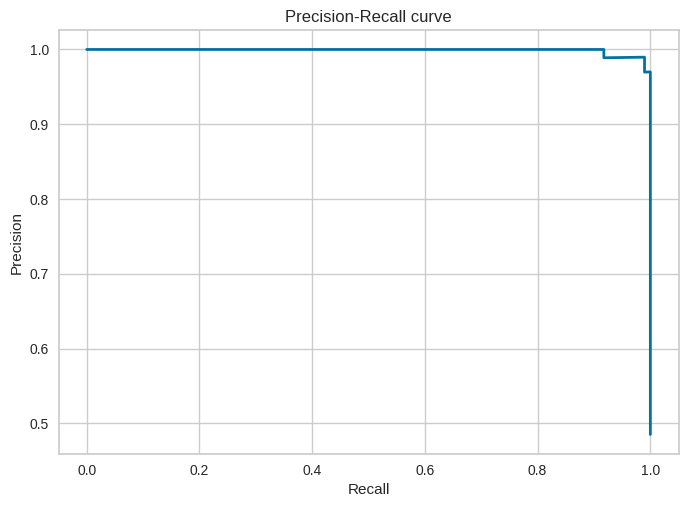

In [21]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.savefig('pr_curve.png')
plt.show()


### Saving the Model

In [22]:
model.save('ann_model.h5')

### Compute Metrics

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Assume y_test and y_pred are your true labels and predicted probabilities respectively
# Convert probabilities to binary class labels if needed
y_pred_classes = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_classes) # Accuracy
auc_score = roc_auc_score(y_test, y_pred) # AUC (Area Under the ROC Curve)
recall = recall_score(y_test, y_pred_classes) # Recall (Sensitivity)
precision = precision_score(y_test, y_pred_classes) # Precision
f1 = f1_score(y_test, y_pred_classes) # F1 Score
kappa = cohen_kappa_score(y_test, y_pred_classes) # Cohen's Kappa
mcc = matthews_corrcoef(y_test, y_pred_classes) # Matthews Correlation Coefficient (MCC)

### Print the metrics


In [26]:
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc_score:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Kappa: {kappa:.4f}')
print(f'MCC: {mcc:.4f}')

Accuracy: 0.9850
AUC: 0.9990
Recall: 0.9897
Precision: 0.9796
F1 Score: 0.9846
Kappa: 0.9700
MCC: 0.9700
